# IE 440 - HOMEWORK 1

Fatmanur Yaman & Hüseyin Emre Bacak & Ömercan Mısırlıoğlu

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

Below cell, I created initial interval and defined epsilon value for tolerance. After that, I plotted the function f(x) for the interval (-10, 10). "axvline", "axhline", and "grid" commands helped me to create the coordinate system.

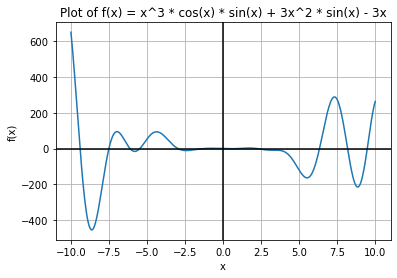

In [2]:
a=-9.5
b=-8
#a= 7.5
#b= 10
#a = 5
#b = 6
initial_a = a
initial_b = b
epsilon = 0.00001
x = np.linspace(-10, 10, 400)
sin = [math.sin(a) for a in x]
cos = [math.cos(a) for a in x]
y = (x**3)*cos*sin + 3*(x**2)*sin - 3*x

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = x^3 * cos(x) * sin(x) + 3x^2 * sin(x) - 3x')
plt.grid(True)
plt.axvline(0, color='black', linestyle='-')
plt.axhline(0, color='black', linestyle='-')
plt.show()

Below cell, I executed my bisection algorithm. "count" variable denotes the current iteration number. "output" dictionary keeps track of the necessary values. In each row, the iteration number, current boundaries of the interval (a, b), current x value in the iteration, function evaluation of that x, and calculations related with convergence.

"temp" variable denotes the x value in the previous iteration.



# Bisection Method

In [3]:
def bisection_method(a,b,epsilon):
    #Bisection
    count = 0
    output = {
        "Iteration": list(),
        "a": list(),
        "b": list(),
        "x": list(),
        "f(x)": list(),
        "|x(k+1) - x(k) / x(k) - x(k-1)|": list(),
        "-log|x(k+1) - x(k)| + log|x(k) - x(k-1)|": list()
    }
    temp = 0
    while b-a >= epsilon:
        output["Iteration"].append(count)
        output["a"].append(a)
        output["b"].append(b)
        x = (a+b)/2
        output["x"].append(x)
        output["f(x)"].append((x**3)*math.cos(x)*math.sin(x)+3*(x**2)*math.sin(x)-3*x)
        x_e = x + epsilon
        if (x**3)*math.cos(x)*math.sin(x)+3*(x**2)*math.sin(x)-3*x >= (x_e**3)*math.cos(x_e)*math.sin(x_e)+3*(x_e**2)*math.sin(x_e)-3*x_e:
            a = x
        else:
            b = x
        next_v = (a+b)/2

        if count == 0:
            output["|x(k+1) - x(k) / x(k) - x(k-1)|"].append("None")
            output["-log|x(k+1) - x(k)| + log|x(k) - x(k-1)|"].append("None")
        else:
            output["|x(k+1) - x(k) / x(k) - x(k-1)|"].append(abs((next_v - x)/(x - temp)))
            output["-log|x(k+1) - x(k)| + log|x(k) - x(k-1)|"].append(round(-math.log(abs(next_v - x), 10) + 
                                                                            math.log(abs(x - temp), 10), 5))
        count += 1
        if count != 0:
            temp = x
            
    return output

# Parameter Cases

### a = -9.5, b = -8, e = 0.0001

In [4]:
df = pd.DataFrame.from_dict(bisection_method(-9.5, -8, 0.00001))
df

,Iteration,a,b,x,f(x),|x(k+1) - x(k) / x(k) - x(k-1)|,-log|x(k+1) - x(k)| + log|x(k) - x(k-1)|
0,0,-9.500000,-8.000000,-8.750000,-444.037885,None,None
1,1,-8.750000,-8.000000,-8.375000,-410.978954,0.5,0.30103
2,2,-8.750000,-8.375000,-8.562500,-451.508563,0.5,0.30103
3,3,-8.750000,-8.562500,-8.656250,-454.403848,0.5,0.30103
4,4,-8.656250,-8.562500,-8.609375,-454.548164,0.5,0.30103
5,5,-8.656250,-8.609375,-8.632812,-454.883120,0.5,0.30103
6,6,-8.632812,-8.609375,-8.621094,-454.816334,0.5,0.30103
7,7,-8.632812,-8.621094,-8.626953,-454.875039,0.5,0.30103
8,8,-8.632812,-8.626953,-8.629883,-454.885425,0.5,0.30103
9,9,-8.632812,-8.629883,-8.631348,-454.885861,0.5,0.30103


In [5]:
print("Algorithm results for given interval")
print("(a, b): (" + str(df.iloc[0]["a"]) + ", " + str(df.iloc[0]["b"]) + ")")
print("x* = " + str(df.iloc[-1]["x"]))
print("f(x*) = " + str(df.iloc[-1]["f(x)"]))

Algorithm results for given interval
(a, b): (-9.5, -8.0)
x* = -8.630826950073242
f(x*) = -454.8860695211224


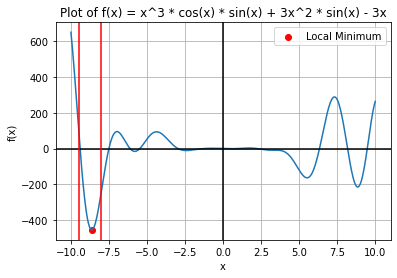

In [6]:
x = np.linspace(-10, 10, 400)
sin = [math.sin(a) for a in x]
cos = [math.cos(a) for a in x]
y = (x**3)*cos*sin + 3*(x**2)*sin - 3*x

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = x^3 * cos(x) * sin(x) + 3x^2 * sin(x) - 3x')
plt.grid(True)
plt.axvline(0, color='black', linestyle='-')
plt.axhline(0, color='black', linestyle='-')
plt.axvline(df.iloc[0]["a"], color='red', linestyle='-')
plt.axvline(df.iloc[0]["b"], color='red', linestyle='-')
plt.scatter(df.iloc[-1]["x"], df.iloc[-1]["f(x)"], color='red', marker='o', label='Local Minimum')
plt.legend(loc='best')
plt.show()

### a = 5, b = 6,   e= 0.00001

In [7]:
df = pd.DataFrame.from_dict(bisection_method(5, 6, 0.00001))
df

,Iteration,a,b,x,f(x),|x(k+1) - x(k) / x(k) - x(k-1)|,-log|x(k+1) - x(k)| + log|x(k) - x(k-1)|
0,0,5.000000,6.000000,5.500000,-163.714470,None,None
1,1,5.500000,6.000000,5.750000,-150.880764,0.5,0.30103
2,2,5.500000,5.750000,5.625000,-161.061541,0.5,0.30103
3,3,5.500000,5.625000,5.562500,-163.278208,0.5,0.30103
4,4,5.500000,5.562500,5.531250,-163.711375,0.5,0.30103
5,5,5.500000,5.531250,5.515625,-163.765677,0.5,0.30103
6,6,5.500000,5.515625,5.507812,-163.753133,0.5,0.30103
7,7,5.507812,5.515625,5.511719,-163.762686,0.5,0.30103
8,8,5.511719,5.515625,5.513672,-163.765004,0.5,0.30103
9,9,5.513672,5.515625,5.514648,-163.765546,0.5,0.30103


In [8]:
print("Algorithm results for given interval")
print("(a, b): (" + str(df.iloc[0]["a"]) + ", " + str(df.iloc[0]["b"]) + ")")
print("x* = " + str(df.iloc[-1]["x"]))
print("f(x*) = " + str(df.iloc[-1]["f(x)"]))

Algorithm results for given interval
(a, b): (5.0, 6.0)
x* = 5.515434265136719
f(x*) = -163.76568400972977


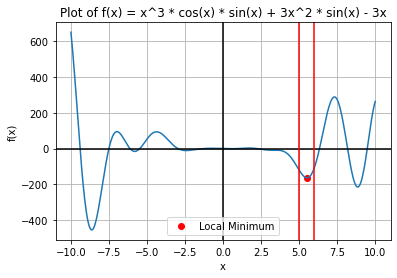

In [9]:
x = np.linspace(-10, 10, 400)
sin = [math.sin(a) for a in x]
cos = [math.cos(a) for a in x]
y = (x**3)*cos*sin + 3*(x**2)*sin - 3*x

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = x^3 * cos(x) * sin(x) + 3x^2 * sin(x) - 3x')
plt.grid(True)
plt.axvline(0, color='black', linestyle='-')
plt.axhline(0, color='black', linestyle='-')
plt.axvline(df.iloc[0]["a"], color='red', linestyle='-')
plt.axvline(df.iloc[0]["b"], color='red', linestyle='-')
plt.scatter(df.iloc[-1]["x"], df.iloc[-1]["f(x)"], color='red', marker='o', label='Local Minimum')
plt.legend(loc='best')
plt.show()

### a = 7.5, b = 10,   e= 0.00001

In [10]:
df = pd.DataFrame.from_dict(bisection_method(7.5, 10, 0.00001))
df

,Iteration,a,b,x,f(x),|x(k+1) - x(k) / x(k) - x(k-1)|,-log|x(k+1) - x(k)| + log|x(k) - x(k-1)|
0,0,7.500000,10.000000,8.750000,-209.555318,None,None
1,1,8.750000,10.000000,9.375000,-55.953427,0.5,0.30103
2,2,8.750000,9.375000,9.062500,-186.526634,0.5,0.30103
3,3,8.750000,9.062500,8.906250,-212.880585,0.5,0.30103
4,4,8.750000,8.906250,8.828125,-214.905766,0.5,0.30103
5,5,8.828125,8.906250,8.867188,-214.826393,0.5,0.30103
6,6,8.828125,8.867188,8.847656,-215.098491,0.5,0.30103
7,7,8.828125,8.847656,8.837891,-215.060074,0.5,0.30103
8,8,8.837891,8.847656,8.842773,-215.093791,0.5,0.30103
9,9,8.842773,8.847656,8.845215,-215.099770,0.5,0.30103


In [11]:
print("Algorithm results for given interval")
print("(a, b): (" + str(df.iloc[0]["a"]) + ", " + str(df.iloc[0]["b"]) + ")")
print("x* = " + str(df.iloc[-1]["x"]))
print("f(x*) = " + str(df.iloc[-1]["f(x)"]))

Algorithm results for given interval
(a, b): (7.5, 10.0)
x* = 8.846006393432617
f(x*) = -215.1001511009524


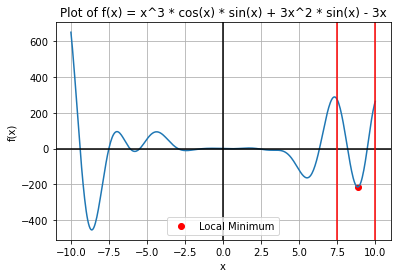

In [12]:
x = np.linspace(-10, 10, 400)
sin = [math.sin(a) for a in x]
cos = [math.cos(a) for a in x]
y = (x**3)*cos*sin + 3*(x**2)*sin - 3*x

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = x^3 * cos(x) * sin(x) + 3x^2 * sin(x) - 3x')
plt.grid(True)
plt.axvline(0, color='black', linestyle='-')
plt.axhline(0, color='black', linestyle='-')
plt.axvline(df.iloc[0]["a"], color='red', linestyle='-')
plt.axvline(df.iloc[0]["b"], color='red', linestyle='-')
plt.scatter(df.iloc[-1]["x"], df.iloc[-1]["f(x)"], color='red', marker='o', label='Local Minimum')
plt.legend(loc='best')
plt.show()

# Golden Section Method

Below cell, I utilized a function to calculate the next iteration's x value. I need this value because of the fact that I am asked to calculate rate of convergence.

In [13]:
def next_value(fx, fy, y0, a, b, g):
    if fx > fy:
        return y0
    else:
        return y0 - (1/g)*(y0-a)

Below cell, I defined the golden ratio and initial points within the initial interval (denoted as x0 and y0). After that, I evaluated the function for these points.

I created a dictionary called "output" for keeping track of iterations. In each row; the iteration number, current boundaries of the interval (a, b), current x and y values (which was denoted as x0 and y0), function evaluations at these points, and calculations related with convergence.

"count", "temp" and "next_v" variables are used for these purposes. "count" denotes the current iteration number. "temp" denotes the x value in the previous iteration. "next_v" denotes the x value in the next iteration.

In [14]:
def golden_section(a,b,epsilon):
    g = 1.618     #golden ratio
    x0 = b - (1/g)*(b-a)
    y0 = a + (1/g)*(b-a)
    fx = x0**3 * math.cos(x0) * math.sin(x0) + 3 * x0**2 * math.sin(x0) - 3*x0
    fy = y0**3 * math.cos(y0) * math.sin(y0) + 3 * y0**2 * math.sin(y0) - 3*y0
    count = 0
    temp = 0
    next_v = x0
    output = {
        "Iteration": list(),
        "a": list(),
        "b": list(),
        "x": list(),
        "y": list(),
        "f(x)": list(),
        "f(y)": list(),
        "|x(k+1) - x(k) / x(k) - x(k-1)|": list(),
        "-log|x(k+1) - x(k)| + log|x(k) - x(k-1)|": list()
    }

    while b-a >= epsilon:
        output["Iteration"].append(count)
        output["a"].append(a)
        output["b"].append(b)
        output["x"].append(x0)
        output["y"].append(y0)
        output["f(x)"].append(fx)
        output["f(y)"].append(fy)
        if x0 > y0:
            x0, y0 = y0, x0

        if count != 0:
            temp = x0

        if fx > fy:
            a = x0
            x0 = y0
            y0 = a + (1/g)*(b-a)
            fx = fy
            fy = y0**3 * math.cos(y0) * math.sin(y0) + 3 * y0**2 * math.sin(y0) - 3*y0

        else:
            b = y0
            y0 = x0
            x0 = b - (1/g)*(b-a)
            fy = fx
            fx = x0**3 * math.cos(x0) * math.sin(x0) + 3 * x0**2 * math.sin(x0) - 3*x0

        next_v = next_value(fx, fy, y0, a, b, g)

        if count == 0:
            output["|x(k+1) - x(k) / x(k) - x(k-1)|"].append("None")
            output["-log|x(k+1) - x(k)| + log|x(k) - x(k-1)|"].append("None")
        else:
            output["|x(k+1) - x(k) / x(k) - x(k-1)|"].append(abs((next_v - x0)/(x0 - temp)))
            output["-log|x(k+1) - x(k)| + log|x(k) - x(k-1)|"].append(round(-math.log(abs(next_v - x0), 10) + 
                                                                            math.log(abs(x0 - temp), 10), 5))

        count += 1
    return output

# Parameter Cases

### a=5, b=6, e=0.0001

In [15]:
df = pd.DataFrame.from_dict(golden_section(5, 6, 0.00001))
df

,Iteration,a,b,x,y,f(x),f(y),|x(k+1) - x(k) / x(k) - x(k-1)|,-log|x(k+1) - x(k)| + log|x(k) - x(k-1)|
0,0,5.000000,6.000000,5.381953,5.618047,-160.143476,-161.399685,None,None
1,1,5.381953,6.000000,5.618047,5.763935,-161.399685,-149.250644,0.617801,0.20915
2,2,5.381953,5.763935,5.527852,5.618047,-163.732264,-161.399685,1.0,0.0
3,3,5.381953,5.618047,5.472130,5.527852,-163.367784,-163.732264,0.38183,0.41813
4,4,5.472130,5.618047,5.527852,5.562313,-163.732264,-163.282100,0.618644,0.20856
5,5,5.472130,5.562313,5.506576,5.527852,-163.748746,-163.732264,1.0,0.0
6,6,5.472130,5.527852,5.493413,5.506576,-163.661773,-163.748746,0.617082,0.20966
7,7,5.493413,5.527852,5.506576,5.514698,-163.748746,-163.765563,0.381631,0.41836
8,8,5.506576,5.527852,5.514698,5.519726,-163.765563,-163.761721,1.0,0.0
9,9,5.506576,5.519726,5.511598,5.514698,-163.762490,-163.765563,0.381061,0.419


In [16]:
print("Algorithm results for given interval")
print("(a, b): (" + str(df.iloc[0]["a"]) + ", " + str(df.iloc[0]["b"]) + ")")
print("x* = " + str(df.iloc[-1]["x"]))
print("f(x*) = " + str(df.iloc[-1]["f(x)"]))

Algorithm results for given interval
(a, b): (5.0, 6.0)
x* = 5.51544949623405
f(x*) = -163.7656840411375


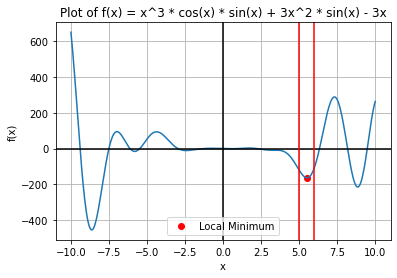

In [17]:
x = np.linspace(-10, 10, 400)
sin = [math.sin(a) for a in x]
cos = [math.cos(a) for a in x]
y = (x**3)*cos*sin + 3*(x**2)*sin - 3*x

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = x^3 * cos(x) * sin(x) + 3x^2 * sin(x) - 3x')
plt.grid(True)
plt.axvline(0, color='black', linestyle='-')
plt.axhline(0, color='black', linestyle='-')
plt.axvline(df.iloc[0]["a"], color='red', linestyle='-')
plt.axvline(df.iloc[0]["b"], color='red', linestyle='-')
plt.scatter(df.iloc[-1]["x"], df.iloc[-1]["f(x)"], color='red', marker='o', label='Local Minimum')
plt.legend(loc='best')
plt.show()

### a=-9.8, b=-7.2, e=0.0001

In [18]:
df = pd.DataFrame.from_dict(golden_section(-9.8, -7.2, 0.00001))
df

,Iteration,a,b,x,y,f(x),f(y),|x(k+1) - x(k) / x(k) - x(k-1)|,-log|x(k+1) - x(k)| + log|x(k) - x(k-1)|
0,0,-9.800000,-7.200000,-8.806922,-8.193078,-430.916457,-337.855692,None,None
1,1,-9.800000,-8.193078,-9.186231,-8.806922,-210.245717,-430.916457,0.618246,0.20884
2,2,-9.186231,-8.193078,-8.806922,-8.572416,-430.916457,-452.409466,0.382076,0.41785
3,3,-8.806922,-8.193078,-8.572416,-8.427538,-452.409466,-426.505627,0.617602,0.20929
4,4,-8.806922,-8.427538,-8.662015,-8.572416,-454.159266,-452.409466,1.0,0.0
5,5,-8.806922,-8.572416,-8.717352,-8.662015,-449.211530,-454.159266,0.618767,0.20847
6,6,-8.717352,-8.572416,-8.662015,-8.627775,-454.159266,-454.879229,0.382275,0.41762
7,7,-8.662015,-8.572416,-8.627775,-8.606639,-454.879229,-454.456782,1.0,0.0
8,8,-8.662015,-8.606639,-8.640864,-8.627775,-454.811152,-454.879229,0.382748,0.41709
9,9,-8.640864,-8.606639,-8.627775,-8.619711,-454.879229,-454.795127,0.614764,0.21129


In [19]:
print("Algorithm results for given interval")
print("(a, b): (" + str(df.iloc[0]["a"]) + ", " + str(df.iloc[0]["b"]) + ")")
print("x* = " + str(df.iloc[-1]["x"]))
print("f(x*) = " + str(df.iloc[-1]["f(x)"]))

Algorithm results for given interval
(a, b): (-9.8, -7.2)
x* = -8.630820396259566
f(x*) = -454.88606959122137


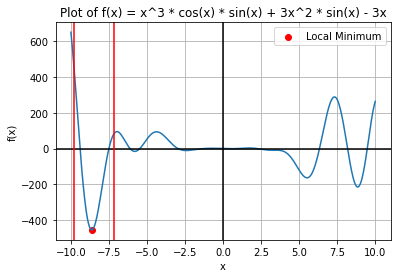

In [20]:
x = np.linspace(-10, 10, 400)
sin = [math.sin(a) for a in x]
cos = [math.cos(a) for a in x]
y = (x**3)*cos*sin + 3*(x**2)*sin - 3*x

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = x^3 * cos(x) * sin(x) + 3x^2 * sin(x) - 3x')
plt.grid(True)
plt.axvline(0, color='black', linestyle='-')
plt.axhline(0, color='black', linestyle='-')
plt.axvline(df.iloc[0]["a"], color='red', linestyle='-')
plt.axvline(df.iloc[0]["b"], color='red', linestyle='-')
plt.scatter(df.iloc[-1]["x"], df.iloc[-1]["f(x)"], color='red', marker='o', label='Local Minimum')
plt.legend(loc='best')
plt.show()

### a=4, b=7.1, e=0.0001

In [21]:
df = pd.DataFrame.from_dict(golden_section(4, 7.1, 0.00001))
df

,Iteration,a,b,x,y,f(x),f(y),|x(k+1) - x(k) / x(k) - x(k-1)|,-log|x(k+1) - x(k)| + log|x(k) - x(k-1)|
0,0,4.000000,7.100000,5.184054,5.915946,-143.762801,-124.827495,None,None
1,1,4.000000,5.915946,4.731801,5.184054,-83.408686,-143.762801,0.618246,0.20884
2,2,4.731801,5.915946,5.184054,5.463658,-143.762801,-163.199067,0.382076,0.41785
3,3,5.184054,5.915946,5.463658,5.636398,-163.199067,-160.456603,1.0,0.0
4,4,5.184054,5.636398,5.356828,5.463658,-158.716081,-163.199067,0.617403,0.20943
5,5,5.356828,5.636398,5.463658,5.529615,-163.199067,-163.722059,0.381754,0.41822
6,6,5.463658,5.636398,5.529615,5.570419,-163.722059,-163.098279,0.618967,0.20833
7,7,5.463658,5.570419,5.504436,5.529615,-163.739612,-163.722059,1.0,0.0
8,8,5.463658,5.529615,5.488851,5.504436,-163.614580,-163.739612,0.616561,0.21002
9,9,5.488851,5.529615,5.504436,5.514045,-163.739612,-163.765260,0.381431,0.41858


In [22]:
print("Algorithm results for given interval")
print("(a, b): (" + str(df.iloc[0]["a"]) + ", " + str(df.iloc[0]["b"]) + ")")
print("x* = " + str(df.iloc[-1]["x"]))
print("f(x*) = " + str(df.iloc[-1]["f(x)"]))

Algorithm results for given interval
(a, b): (4.0, 7.1)
x* = 5.515449247975413
f(x*) = -163.76568404142915


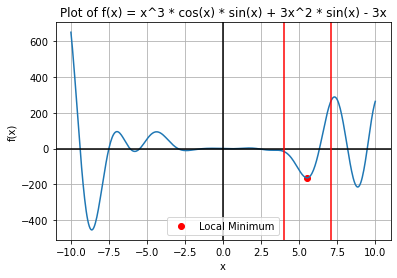

In [23]:
x = np.linspace(-10, 10, 400)
sin = [math.sin(a) for a in x]
cos = [math.cos(a) for a in x]
y = (x**3)*cos*sin + 3*(x**2)*sin - 3*x

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = x^3 * cos(x) * sin(x) + 3x^2 * sin(x) - 3x')
plt.grid(True)
plt.axvline(0, color='black', linestyle='-')
plt.axhline(0, color='black', linestyle='-')
plt.axvline(df.iloc[0]["a"], color='red', linestyle='-')
plt.axvline(df.iloc[0]["b"], color='red', linestyle='-')
plt.scatter(df.iloc[-1]["x"], df.iloc[-1]["f(x)"], color='red', marker='o', label='Local Minimum')
plt.legend(loc='best')
plt.show()

# Newton's Method

In [24]:
from sympy import symbols, diff, sin, cos, lambdify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def newtons_method(x, epsilon):
    
    df_list = []  #An empyt list for the results dataframe
    
    def derivatives(x_value):#A function that calculates the given function, first derivative, and the second derivative.
        #Taking the derivative of the function wrt X.
        x = symbols("x")
        f = (x**3)*cos(x)*sin(x)+3*x**2*sin(x)-3*x
        f_first = diff(f,x)
        f_second = diff(f_first,x)
        #Converting function to numerical type.
        numerical_f = lambdify(x, f, "math")
        numerical_f_first = lambdify(x, f_first, "math")
        numerical_f_second = lambdify(x, f_second, "math")
        #Calculating the functions with the given value.
        f_x = numerical_f(x_value)
        f_first_x = numerical_f_first(x_value)
        f_second_x = numerical_f_second(x_value)
        return [x_value, f_x, f_first_x, f_second_x] #Returning a list of x, f(x), f'(x), and f''(x).
    
    #Initial starting point of the algorithm.
    k = 0
    x = derivatives(x)[0]
    x_curr = x - (derivatives(x)[2]/derivatives(x)[3])
    x_fut = x_curr - (derivatives(x_curr)[2]/derivatives(x_curr)[3])
    convergence = abs(x_fut-x_curr)/(abs(x_curr-x)**2)
    row = [k, derivatives(x)[0], derivatives(x)[1],derivatives(x)[2],
              derivatives(x)[3],convergence]
    df_list.append(row)
    x_prev = x
    
    #As the stopping criteria is not being satisfied, the algorithms should work.
    while (abs(x_fut - x_curr)>epsilon and abs(derivatives(x_fut)[1] - derivatives(x_curr)[1])>epsilon 
           and abs(derivatives(x_curr)[2])>epsilon):
        #The Newton's Method Algorithm
        x_curr = x_prev - (derivatives(x_prev)[2]/derivatives(x_prev)[3])
        x_fut = x_curr - (derivatives(x_curr)[2]/derivatives(x_curr)[3])
        convergence = abs(x_fut-x_curr)/(abs(x_curr-x_prev)**2)
        x_prev = x_curr
        k = k+1
        #Collecting the results.
        row = [k, derivatives(x_curr)[0], derivatives(x_curr)[1],derivatives(x_curr)[2],
                  derivatives(x_curr)[3], convergence]
        df_list.append(row)
    return df_list #Returning dataframe of the results.

# Parameter Cases

### x = 4 , e = 0.000000001

In [26]:
column_names = ["Iteration", "x_k", "f_k(x_k)", "f_k'(x_k)", "f_k''(x_k)", "Convergence"]
df = pd.DataFrame(newtons_method(4, 0.000000001), columns=column_names)
df

,Iteration,x_k,f_k(x_k),f_k'(x_k),f_k''(x_k),Convergence
0,0,4.000000,-16.667056,-38.105558,-128.322749,1.596286
1,1,3.703049,-10.126752,-9.121672,-64.802888,1.596286
2,2,3.562289,-9.382562,-2.161488,-34.621175,3.151018
3,3,3.499856,-9.307078,-0.382301,-22.544431,4.350550
4,4,3.482899,-9.303687,-0.026363,-19.449254,4.713625
5,5,3.481543,-9.303669,-0.000165,-19.205521,4.683111


In [27]:
print("x* = " + str(df.iloc[-1]["x_k"]))
print("f(x*) = " + str(df.iloc[-1]["f_k(x_k)"]))

x* = 3.4815431431137758
f(x*) = -9.30366946726433


Text(3.4815431431137758, -9.30366946726433, 'Optimal Point Found By Algorithm')

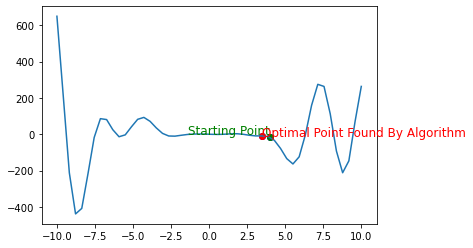

In [28]:
def f(x):
    return x**3 * np.cos(x) * np.sin(x) + 3 * x**2 * np.sin(x) - 3 * x

x = np.linspace(-10, 10)
y = f(x)
plt.plot(x, y)
x1, y1 = df.iloc[0]["x_k"], df.iloc[0]["f_k(x_k)"]
x2, y2 = df.iloc[-1]["x_k"], df.iloc[-1]["f_k(x_k)"]
plt.scatter([x1, x2], [y1, y2], color='blue', label='Marked Points')
plt.scatter([x1], [y1], color='green', label='Marked Points')
plt.scatter([x2], [y2], color='red', label='Marked Points')
plt.text(x1, y1, 'Starting Point', fontsize=12, ha='right', va='bottom', color="green")
plt.text(x2, y2, 'Optimal Point Found By Algorithm', fontsize=12, ha='left', color="red")

### x = 6 , e = 0.000000001

In [29]:
column_names = ["Iteration", "x_k", "f_k(x_k)", "f_k'(x_k)", "f_k''(x_k)", "Convergence"]
df = pd.DataFrame(newtons_method(6, 0.000000001), columns=column_names)
df

,Iteration,x_k,f_k(x_k),f_k'(x_k),f_k''(x_k),Convergence
0,0,6.000000,-106.126749,243.936951,502.046285,0.005647
1,1,5.514115,-163.765301,-0.575085,431.374099,0.005647
2,2,5.515448,-163.765684,0.000481,432.095359,0.626332


In [30]:
print("x* = " + str(df.iloc[-1]["x_k"]))
print("f(x*) = " + str(df.iloc[-1]["f_k(x_k)"]))

x* = 5.515447766160452
f(x*) = -163.76568404261627


Text(5.515447766160452, -163.76568404261627, 'Optimal Point Found By Algorithm')

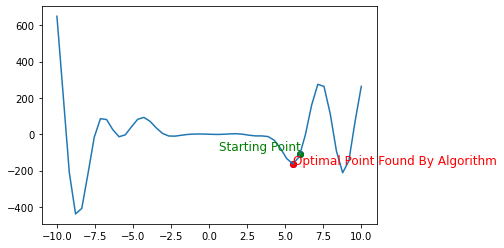

In [31]:
def f(x):
    return x**3 * np.cos(x) * np.sin(x) + 3 * x**2 * np.sin(x) - 3 * x

x = np.linspace(-10, 10)
y = f(x)
plt.plot(x, y)
x1, y1 = df.iloc[0]["x_k"], df.iloc[0]["f_k(x_k)"]
x2, y2 = df.iloc[-1]["x_k"], df.iloc[-1]["f_k(x_k)"]
plt.scatter([x1, x2], [y1, y2], color='blue', label='Marked Points')
plt.scatter([x1], [y1], color='green', label='Marked Points')
plt.scatter([x2], [y2], color='red', label='Marked Points')
plt.text(x1, y1, 'Starting Point', fontsize=12, ha='right', va='bottom', color="green")
plt.text(x2, y2, 'Optimal Point Found By Algorithm', fontsize=12, ha='left', color="red")

### x = 8 , e = 0.000000001

In [32]:
column_names = ["Iteration", "x_k", "f_k(x_k)", "f_k'(x_k)", "f_k''(x_k)", "Convergence"]
df = pd.DataFrame(newtons_method(8, 0.000000001), columns=column_names)
df

,Iteration,x_k,f_k(x_k),f_k'(x_k),f_k''(x_k),Convergence
0,0,8.000000,92.253534,-501.407183,-277.826561,0.261513
1,1,6.195251,-49.499203,332.474156,390.329450,0.261513
2,2,5.343473,-157.870676,-65.494650,325.560959,0.277281
3,3,5.544648,-163.579255,12.843106,447.375077,0.709335
4,4,5.515940,-163.765631,0.213179,432.361086,0.598275
5,5,5.515447,-163.765684,0.000066,432.094839,0.624746


In [33]:
print("x* = " + str(df.iloc[-1]["x_k"]))
print("f(x*) = " + str(df.iloc[-1]["f_k(x_k)"]))

x* = 5.515446804868879
f(x*) = -163.76568404287903


Text(5.515446804868879, -163.76568404287903, 'Optimal Point Found By Algorithm')

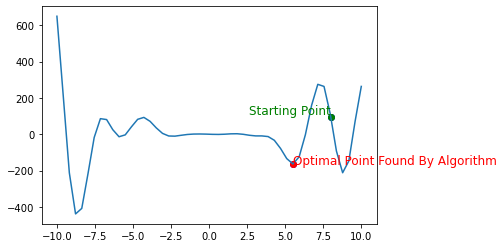

In [34]:
def f(x):
    return x**3 * np.cos(x) * np.sin(x) + 3 * x**2 * np.sin(x) - 3 * x

x = np.linspace(-10, 10)
y = f(x)
plt.plot(x, y)
x1, y1 = df.iloc[0]["x_k"], df.iloc[0]["f_k(x_k)"]
x2, y2 = df.iloc[-1]["x_k"], df.iloc[-1]["f_k(x_k)"]
plt.scatter([x1, x2], [y1, y2], color='blue', label='Marked Points')
plt.scatter([x1], [y1], color='green', label='Marked Points')
plt.scatter([x2], [y2], color='red', label='Marked Points')
plt.text(x1, y1, 'Starting Point', fontsize=12, ha='right', va='bottom', color="green")
plt.text(x2, y2, 'Optimal Point Found By Algorithm', fontsize=12, ha='left', color="red")

### x = 9 , e = 0.0005

In [35]:
column_names = ["Iteration", "x_k", "f_k(x_k)", "f_k'(x_k)", "f_k''(x_k)", "Convergence"]
df = pd.DataFrame(newtons_method(9, 0.0005), columns=column_names)
df

,Iteration,x_k,f_k(x_k),f_k'(x_k),f_k''(x_k),Convergence
0,0,9.000000,-200.590060,187.975674,1199.502521,0.110669
1,1,8.843289,-215.095657,-3.308234,1217.217457,0.110669
2,2,8.846007,-215.100151,0.001270,1218.145077,0.141151


In [36]:
print("x* = " + str(df.iloc[-1]["x_k"]))
print("f(x*) = " + str(df.iloc[-1]["f_k(x_k)"]))

x* = 8.8460065034334
f(x*) = -215.10015110082009


Text(8.8460065034334, -215.10015110082009, 'Optimal Point Found By Algorithm')

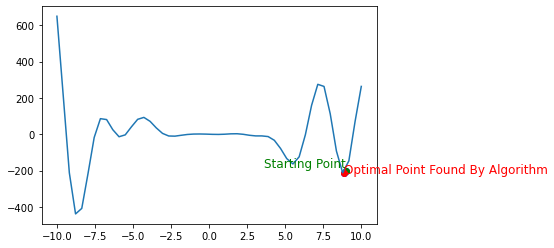

In [37]:
def f(x):
    return x**3 * np.cos(x) * np.sin(x) + 3 * x**2 * np.sin(x) - 3 * x

x = np.linspace(-10, 10)
y = f(x)
plt.plot(x, y)
x1, y1 = df.iloc[0]["x_k"], df.iloc[0]["f_k(x_k)"]
x2, y2 = df.iloc[-1]["x_k"], df.iloc[-1]["f_k(x_k)"]
plt.scatter([x1, x2], [y1, y2], color='blue', label='Marked Points')
plt.scatter([x1], [y1], color='green', label='Marked Points')
plt.scatter([x2], [y2], color='red', label='Marked Points')
plt.text(x1, y1, 'Starting Point', fontsize=12, ha='right', va='bottom', color="green")
plt.text(x2, y2, 'Optimal Point Found By Algorithm', fontsize=12, ha='left', color="red")

# Secant Method

In [38]:
def secant_method(x0, x1, epsilon):
    
    df_list = []  #An empyt list for the results dataframe
    
    def derivatives(x_value): #Only the first derivative is needed.
        x = symbols("x")
        f = (x**3)*cos(x)*sin(x)+3*x**2*sin(x)-3*x
        f_first = diff(f,x)
        #Converting function to numerical type.
        numerical_f = lambdify(x, f, "math")
        numerical_f_first = lambdify(x, f_first, "math")
        #Calculating the functions with the given value.
        f_x = numerical_f(x_value)
        f_first_x = numerical_f_first(x_value)
        return [x_value, f_x, f_first_x] #Returning a list of x, f(x), and f'(x).
    
    k = 0
    x_prev = derivatives(x0)[0]
    x_curr = derivatives(x1)[0]
    x_fut = x_curr - (((derivatives(x_curr)[2]*(x_curr-x_prev))/(derivatives(x_curr)[2]-derivatives(x_prev)[2])))
    convergence = abs(x_fut-x_curr)/(abs(x_curr-x_prev)**1.618)
    row = [k, derivatives(x_prev)[0], derivatives(x_prev)[1],derivatives(x_prev)[2],convergence]
    x_prev = x1
    df_list.append(row)
    
    #As the stopping criteria is not being satisfied, the algorithms should work.
    while (abs(x_fut - x_curr)>epsilon):
        #The Secent Method Algorithm
        x_curr = x_fut
        x_fut = x_curr - ((derivatives(x_curr)[2]*(x_curr-x_prev))/(derivatives(x_curr)[2]-derivatives(x_prev)[2]))
        convergence = abs(x_fut-x_curr)/(abs(x_curr-x_prev)**1.618)
        x_prev = x_curr
        k = k+1
        #Collecting the results.
        row = [k, derivatives(x_prev)[0], derivatives(x_prev)[1],derivatives(x_prev)[2],convergence]
        df_list.append(row)
    return df_list #Returning dataframe of the results.

# Parameter Cases

### x0 = 5, x1 = 7, e = 0.0001

In [39]:
column_names = ["Iteration", "x_k", "f_k(x_k)", "f_k'(x_k)", "Convergence"]
df = pd.DataFrame(secant_method(5,7,0.0001), columns=column_names)
df

,Iteration,x_k,f_k(x_k),f_k'(x_k),Convergence
0,0,5.000000,-120.920640,-135.777797,0.425255
1,1,5.694684,-156.360415,84.892431,0.422968
2,2,5.043752,-126.770398,-131.414774,0.792152
3,3,5.439217,-162.551655,-31.290219,0.554440
4,4,5.562806,-163.271797,21.048703,1.464060
5,5,5.513103,-163.764499,-1.011102,0.292976
6,6,5.515381,-163.765683,-0.028237,1.234074


In [40]:
print("x* = " + str(df.iloc[-1]["x_k"]))
print("f(x*) = " + str(df.iloc[-1]["f_k(x_k)"]))

x* = 5.515381301919676
f(x*) = -163.76568312022212


Text(5.515381301919676, -163.76568312022212, 'Optimal Point Found By Algorithm')

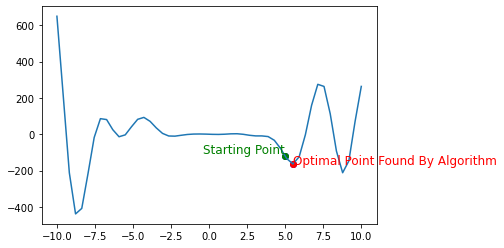

In [41]:
def f(x):
    return x**3 * np.cos(x) * np.sin(x) + 3 * x**2 * np.sin(x) - 3 * x

x = np.linspace(-10, 10)
y = f(x)
plt.plot(x, y)
x1, y1 = df.iloc[0]["x_k"], df.iloc[0]["f_k(x_k)"]
x2, y2 = df.iloc[-1]["x_k"], df.iloc[-1]["f_k(x_k)"]
plt.scatter([x1, x2], [y1, y2], color='blue', label='Marked Points')
plt.scatter([x1], [y1], color='green', label='Marked Points')
plt.scatter([x2], [y2], color='red', label='Marked Points')
plt.text(x1, y1, 'Starting Point', fontsize=12, ha='right', va='bottom', color="green")
plt.text(x2, y2, 'Optimal Point Found By Algorithm', fontsize=12, ha='left', color="red")

### x0 = 4, x1 = 6, e = 0.0001

In [42]:
column_names = ["Iteration", "x_k", "f_k(x_k)", "f_k'(x_k)", "Convergence"]
df = pd.DataFrame(secant_method(4,6,0.0001), columns=column_names)
df

,Iteration,x_k,f_k(x_k),f_k'(x_k),Convergence
0,0,4.000000,-16.667056,-38.105558,0.563542
1,1,4.270211,-32.138477,-77.759043,0.172276
2,2,4.688329,-77.508712,-134.054477,4.081745
3,3,3.692680,-10.035607,-8.461711,0.067556
4,4,3.625598,-9.597451,-4.766080,6.849106
5,5,3.539087,-9.341314,-1.411911,1.910343
6,6,3.502671,-9.308244,-0.446490,3.582739
7,7,3.485829,-9.303849,-0.084133,2.896791
8,8,3.481919,-9.303671,-0.007391,2.962701
9,9,3.481542,-9.303669,-0.000145,2.621147


In [43]:
print("x* = " + str(df.iloc[-1]["x_k"]))
print("f(x*) = " + str(df.iloc[-1]["f_k(x_k)"]))

x* = 3.481542108116675
f(x*) = -9.303669467103587


Text(3.481542108116675, -9.303669467103587, 'Optimal Point Found By Algorithm')

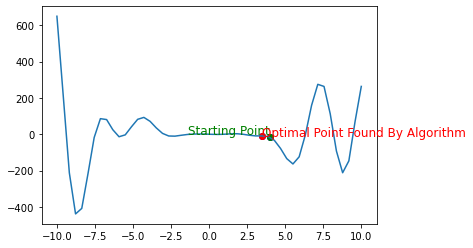

In [44]:
def f(x):
    return x**3 * np.cos(x) * np.sin(x) + 3 * x**2 * np.sin(x) - 3 * x

x = np.linspace(-10, 10)
y = f(x)
plt.plot(x, y)
x1, y1 = df.iloc[0]["x_k"], df.iloc[0]["f_k(x_k)"]
x2, y2 = df.iloc[-1]["x_k"], df.iloc[-1]["f_k(x_k)"]
plt.scatter([x1, x2], [y1, y2], color='blue', label='Marked Points')
plt.scatter([x1], [y1], color='green', label='Marked Points')
plt.scatter([x2], [y2], color='red', label='Marked Points')
plt.text(x1, y1, 'Starting Point', fontsize=12, ha='right', va='bottom', color="green")
plt.text(x2, y2, 'Optimal Point Found By Algorithm', fontsize=12, ha='left', color="red")

### x0 = 8, x1 = 10, e = 0.0001

In [45]:
column_names = ["Iteration", "x_k", "f_k(x_k)", "f_k'(x_k)", "Convergence"]
df = pd.DataFrame(secant_method(8,10,0.0001), columns=column_names)
df

,Iteration,x_k,f_k(x_k),f_k'(x_k),Convergence
0,0,8.000000,92.253534,-501.407183,0.221173
1,1,9.321112,-84.344578,509.213410,2.571700
2,2,10.695374,-14.302448,-1078.325335,0.558083
3,3,9.761916,166.542990,523.760385,0.341136
4,4,10.067086,277.048952,151.214063,0.845211
5,5,10.190952,282.194185,-73.551931,1.189647
6,6,10.150419,283.603833,3.496262,0.329011
7,7,10.152258,283.607111,0.066746,0.954180


In [46]:
print("x* = " + str(df.iloc[-1]["x_k"]))
print("f(x*) = " + str(df.iloc[-1]["f_k(x_k)"]))

x* = 10.15225783700372
f(x*) = 283.60711089335655


Text(10.15225783700372, 283.60711089335655, 'Optimal Point Found By Algorithm')

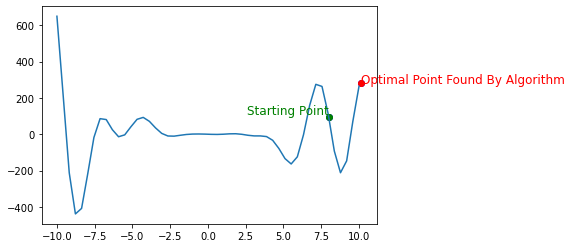

In [47]:
def f(x):
    return x**3 * np.cos(x) * np.sin(x) + 3 * x**2 * np.sin(x) - 3 * x

x = np.linspace(-10, 10)
y = f(x)
plt.plot(x, y)
x1, y1 = df.iloc[0]["x_k"], df.iloc[0]["f_k(x_k)"]
x2, y2 = df.iloc[-1]["x_k"], df.iloc[-1]["f_k(x_k)"]
plt.scatter([x1, x2], [y1, y2], color='blue', label='Marked Points')
plt.scatter([x1], [y1], color='green', label='Marked Points')
plt.scatter([x2], [y2], color='red', label='Marked Points')
plt.text(x1, y1, 'Starting Point', fontsize=12, ha='right', va='bottom', color="green")
plt.text(x2, y2, 'Optimal Point Found By Algorithm', fontsize=12, ha='left', color="red")

### x0 = -6, x1 =-5, e = 0.00005

In [48]:
column_names = ["Iteration", "x_k", "f_k(x_k)", "f_k'(x_k)", "Convergence"]
df = pd.DataFrame(secant_method(-6,-5,0.00005), columns=column_names)
df

,Iteration,x_k,f_k(x_k),f_k'(x_k),Convergence
0,0,-6.000000,-9.773001,-62.658084,0.646897
1,1,-5.646897,-12.273999,46.622547,0.895184
2,2,-6.089325,-2.985381,-88.885801,1.085763
3,3,-5.799117,-15.983351,1.116938,0.026657
4,4,-5.802719,-15.985326,-0.020650,0.587520
5,5,-5.802653,-15.985327,0.000015,0.288899


In [49]:
print("x* = " + str(df.iloc[-1]["x_k"]))
print("f(x*) = " + str(df.iloc[-1]["f_k(x_k)"]))

x* = -5.802653396473716
f(x*) = -15.985326836442777


Text(-5.802653396473716, -15.985326836442777, 'Optimal Point Found By Algorithm')

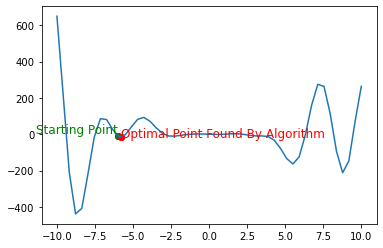

In [50]:
def f(x):
    return x**3 * np.cos(x) * np.sin(x) + 3 * x**2 * np.sin(x) - 3 * x

x = np.linspace(-10, 10)
y = f(x)
plt.plot(x, y)
x1, y1 = df.iloc[0]["x_k"], df.iloc[0]["f_k(x_k)"]
x2, y2 = df.iloc[-1]["x_k"], df.iloc[-1]["f_k(x_k)"]
plt.scatter([x1, x2], [y1, y2], color='blue', label='Marked Points')
plt.scatter([x1], [y1], color='green', label='Marked Points')
plt.scatter([x2], [y2], color='red', label='Marked Points')
plt.text(x1, y1, 'Starting Point', fontsize=12, ha='right', va='bottom', color="green")
plt.text(x2, y2, 'Optimal Point Found By Algorithm', fontsize=12, ha='left', color="red")